# Business Data Analysis

## Assessment 2

### Multiple linear regression / logistic regression model 

Regression searches for relationships between variables.

Multiple linear regression is the statistical technique that is used to predict the outcome of a variable based on the value of two or more variables. It is an extension of linear Regression.

Null hyppthesis: is hypothesis that there is no significant difference between specific population, any observed difference being due to sampling or experimental error.


<b>Dataset</b>
The dataset has data collected from New York, California and Florida about 50 business Startups (17 in each state). The variables used in the dataset are Profit, R&D spending, Administration Spending, and Marketing Spending.

I downladed the dataset from Kaggle which is open for anyone to use. Kaggle is the world's largest data science community with powerful tools and resources to help you achieve your data science goals.

Link to the [database](https://www.kaggle.com/farhanmd29/50-startups).

In [2]:
# Importing the nessessary libraries

import warnings
warnings.filterwarnings('ignore')     # Ignore unnecessary warnings

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 

plt.style.use(style="seaborn")
%matplotlib inline

Dataset of 50 startup companies

In [3]:
# Importing the dataset
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


The dataset contains the follwing features (independent variables):

1. R&D Spend - The total amount of money spent on Research and Development by the startup.
2. Administration - The total amount of money spent on Administration by the startup.
3. Marketing Spend - The total amount of moey spent on Marketing by the startup.
4. State - The State where the startup is launched or operates.
5. Profit - The total amount of profit acquired by the startup.

The Overall goal of linear regression in this case is to predict the profits for the startups in the future.

<b>Preparing the data for Regreesion</b>

In [23]:
# For storing the features in X 
x = df.iloc[:, :-1].values

# Creates a Variable Profit which tells you the 
# Profit acquired by the startup
y = df.iloc[:, -1].values
print(x)
print(y)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532

In [5]:
## Encoding categoriacal data using OneHotEncoding

# Importing necessary libriaries
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# The only categorical data is the name of the state
# which is stored at the 3rd Index in our Dataset, so we encode 
# the column
ct = ColumnTransformer(transformers = [('encoding',OneHotEncoder(),[3])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))

In [6]:
print(x)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

The Linear Regression equation would look like:

$$y=b_0{X_0} + b_1{x_1} + b_2{x_2} … + C$$

In [7]:
##x = x[:, 1:]

### Splitting the dataset into the Training set and Test set
Importing the Libraries and Applying Cross Validation with 80% data as Training Data and 20% as Test Data.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [9]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [10]:
## Importing the Linear Regression Class
from sklearn.linear_model import LinearRegression

## Creating an object of the Linear Regression Class
regressor = LinearRegression()



## Fit the created object to our training set
regressor.fit(X_train, y_train)

LinearRegression()

In [11]:
# Comparing the predicted values of the model with the 
# actual values of the model
y_pred = regressor.predict(X_test)

np.set_printoptions(precision = 2)
print(np.concatenate((y_pred.reshape(-1,1),y_test.reshape(-1,1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


In [12]:
# Getting accuracy of the model
#from sklearn.metrics import r2_score
#r2_score(y_test,regressor.predict(X_test))

In [13]:
print("Training Score: ", regressor.score(X_train, y_train))
print("Training Score: ", regressor.score(X_test, y_test))

Training Score:  0.9501847627493607
Training Score:  0.9347068473282303


The accuracy of this Multiple Linear Regreesion Model is and 95% and 93.4% accurate for the training and test data respectively, which is good.

In [14]:
print("Coefficients: ", regressor.coef_)
print("Intercept", regressor.intercept_)

Coefficients:  [ 8.66e+01 -8.73e+02  7.86e+02  7.73e-01  3.29e-02  3.66e-02]
Intercept 42467.52924854249


In [15]:
print(y_pred)

[103015.2  132582.28 132447.74  71976.1  178537.48 116161.24  67851.69
  98791.73 113969.44 167921.07]


In [16]:
new_regressor = pd.DataFrame({'Actual Value': y_test, 'Predicted Value': y_pred})
new_regressor.head(10)

,Actual Value,Predicted Value
0,103282.38,103015.201598
1,144259.40,132582.277608
2,146121.95,132447.738452
3,77798.83,71976.098513
4,191050.39,178537.482211
5,105008.31,116161.242302
6,81229.06,67851.692097
7,97483.56,98791.733747
8,110352.25,113969.435330
9,166187.94,167921.065696


In [17]:
## Model Evaluation
from sklearn import metrics

print('R squared: {:.2f}'.format(regressor.score(x,y)*100))

R squared: 94.85


<b>R Squared:</b> R Square is the coefficient of determination. It tells us how many points fall on the regression line. The value of R Square is 94.85, which indicates that 94.85% of the data fit the regression model.

### Things for the report

- A description of the sources of the datasets
- A clear statement of the objectives of the analysis including the null hypothesis and the alternative hypothesis;
- Descriptive statistics for each variable in the dataset;
- A description of the number of independent/dependent variables in the proposed analysis and a description of their levels of measurement;
- A report on the results of preliminary tests to check the assumptions of the technique are not being violated;
- An appropriate analysis performed using R, Python or any other software tool of your choice;
- Regression diagnostics appropriate to the analysis being carried out;
- A formal report on the results of the analysis; and
- A clear statement of the decisions and conclusions you have come to as a result of the analysis

## Time series analysis

Time series analysis comprises methods for analysing time series data in order to extract meaningful statistics and other characteristics of the data in the .

Time series is a sequence where we record a metric over regular intervals.

Forcasting refers to the future values that this sequence will take.

In this case, we will be looking at the stocp price of the S&P 500 

We will only use the 'Close' price because we will only use this feature to predict the future values. This is call univariariate time series forcasting.

There are different kind of time series analysis techniques mainly used. Two we are going to focus on are Autoregressive Integrated Moving Average(ARIMA) and Seasonal Autoregressive Integrated Moving-Average (SARIMA)

ARIMA is a forcasting algorithm that takes into account previous pasr values to predict future values because it considers that the information that is found in those past values are infdicitive of future values.

<b>ARIMA Model</b>

ARIMA (AutoRegressive Integrated Moving Average) is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

ARIMA models explain a time series based on its own past values, basically its own lags and the lagged forecast errors.


AR - Auto regression - is  a model that uses the dependent relationship between the data and the lagged data

ARIMA Model is simple and flexible 

An ARIMA model is characterised by 3 terms (<i>p</i>, <i>d</i>, <i>q</i>):
- <i>p</i> is the order of the AR term
- <i>d</i> is the number of differencing required to make the time series stationary
- <i>q</i> is the order of the MA term

In order to fit ARIMA model to the data, we need the time series to be stationary or as close to non-stationary as possible. 

Stock price time series are usually non-stationary but we can get stationary if we get the returns. That is what differencing means.

<b>Stationarity</b>
Subract the previous value from the current value. Now if we just difference once, we might not get a stationary needs to be imputed into our ARIMA model.

<b>ADF test</b>

ADF test tries to prove the null hypothesis wrong.

We'l  use the Augumented Dickey Fuller (ADF) test to check if the price series is stationary.

The null hypothesis of the ADF test is that thetime series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we can reject the null hypothesis and infer that the time series is indeed stationary.

So, in our case, if the p-value > 0.05 we'll need to find the order of differencing.

Step:
1. Visualise the Time Series Data
2. Identify if the data is sttionary
3. Plot theCorrelation and Auto Correlation CHarts
4. Construct the ARIMA Model or Seasonal ARIMA based on the data


Time series technique: The ARIMA (autoregressive integrated moving average model) Method 

VAR Model

Dataset: S&P 500 monthly over 3 year in U.S. dollers.

In [18]:
## Importing the necessary libraries
import pandas as pd

SP_500 = pd.read_csv("SaP_500_3yrs_Monthly.csv")

SP_500.head(50)

,Date,Open,High,Low,Close
0,11/2021,4610.62,4663.46,4595.06,4660.57
1,10/2021,4317.16,4608.08,4278.94,4605.38
2,09/2021,4528.80,4545.85,4305.91,4307.54
3,08/2021,4406.86,4537.36,4367.73,4522.68
4,07/2021,4300.73,4429.97,4233.13,4395.26
5,06/2021,4216.52,4302.43,4164.40,4297.50
6,05/2021,4191.98,4238.04,4056.88,4204.11
7,04/2021,3992.78,4218.78,3992.78,4181.17
8,03/2021,3842.51,3994.41,3723.34,3972.89
9,02/2021,3731.17,3950.43,3725.62,3811.15


In [20]:
# Creating a new Dataframe using only the 'Date' and 'Close' variables
# to plot the dataset only using the closing day 
# price of the S&P Stock Price
SP_500 = pd.DataFrame(SP_500, columns = ["Date", "Close"])

print(SP_500)

       Date    Close
0   11/2021  4660.57
1   10/2021  4605.38
2   09/2021  4307.54
3   08/2021  4522.68
4   07/2021  4395.26
5   06/2021  4297.50
6   05/2021  4204.11
7   04/2021  4181.17
8   03/2021  3972.89
9   02/2021  3811.15
10  01/2021  3714.24
11  12/2020  3756.07
12  11/2020  3621.63
13  10/2020  3269.96
14  09/2020  3363.00
15  08/2020  3500.31
16  07/2020  3271.12
17  06/2020  3100.29
18  05/2020  3044.31
19  04/2020  2912.43
20  03/2020  2584.59
21  02/2020  2954.22
22  01/2020  3225.52
23  12/2019  3230.78
24  11/2019  3140.98
25  10/2019  3037.56
26  09/2019  2976.74
27  08/2019  2926.46
28  07/2019  2980.38
29  06/2019  2941.76
30  05/2019  2752.06
31  04/2019  2945.83
32  03/2019  2834.40
33  02/2019  2784.49
34  01/2019  2704.10
35  12/2018  2506.85
36  11/2018  2760.17
37  10/2018  2711.74
38  09/2018  2913.98
39  08/2018  2901.52
40  07/2018  2816.29
41  06/2018  2718.37
42  05/2018  2705.27
43  04/2018  2648.05
44  03/2018  2640.87


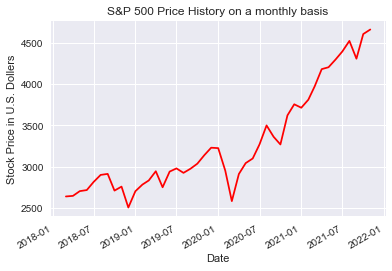

In [19]:
## Draw a plot of the S&P 50 data
from matplotlib import pyplot as plt

# Creates a Variable 'SP_500_Profit' which tells you the 
# Profit acquired by the startup
# It also reverses the order of the data to improve the 
# the output of the plot of the data
SP_500_Profit = SP_500.iloc[:, -1].values
SP_500_Profit = SP_500_Profit[::-1]

# Creates a Variable 'SP_500_Date' which contains the date 
SP_500_Date = SP_500.iloc[:, 0].values
SP_500_Date = SP_500_Date[::-1]

SP_500_Date = pd.to_datetime(SP_500_Date)

Plotting_SP_500 = pd.DataFrame(SP_500_Profit, SP_500_Date)

plt.figure('S&P 500 Price History')
plt.title('S&P 500 Price History on a monthly basis')
plt.xlabel('Date')
plt.ylabel('Stock Price in U.S. Dollers')
plt.grid(True)
plt.plot(Plotting_SP_500, color = 'red')
plt.gcf().autofmt_xdate()

plt.show()

------------------------------------------------------------------

An ARIMA model is characterized by 3 terms (p, d, q):

- <i>p</i> is the order of the AR term

- <i>d</i> is the number of differencing required to make the time series stationary

- <i>q</i> is the order of the MA term

As we see in the parameters required by the model, any stationary time series can be modeled with ARIMA models.

### Stationarity

Subtract the previous value from the current value. Now if we just difference once, we might not get a stationary series so we might need to do that multiple times. 

And the minimum number of differencing operations needed to make the series stationary needs to be imputed into our ARIMA model.

#### ADF test

We'll use the Augumented Dickey Fuller (ADF) test to check if the price series is stationary.

The null hypothesis of the ADF test is that the time series is non-stationary. So, if the p-value of the test is less than the significance level (0.05) then we can reject the null hypothesis and infer that the time series is indeed stationary.


{
Just some notes: (Should move to the top)
To identify the nature of data, we will be using the null hypothesis.

H0: The null hypothesis: It is a statement about the population that either is believed to be true or is used to put forth an argument unless it can be shown to be incorrect beyond a reasonable doubt.

$H_1$: The alternative hypothesis: It is a claim about the population that is contradictory to H0 and what we conclude when we reject $H_0$.

$H_1$: It is non-stationary
$H_1$: It is stationary

We will be considering the null hypothesis that data is not stationary and the alternate hypothesis that data is stationary.
}

So, in our case, if the p-value > 0.05 we'll need to find the order of differencing.

In [20]:
# Check if the price series is stationary
from statsmodels.tsa.stattools import adfuller

SP_500_Close_Values = SP_500['Close']
Reverse_SP_500_Close_Values = SP_500_Close_Values[::-1]

result = adfuller(Reverse_SP_500_Close_Values.dropna())

print("ADF Statistic:   ", result[0])
print("p-value:         ", result[1])

ADF Statistic:    0.3802555084426435
p-value:          0.9807413629845056


Since p-value is greater than the significance level.

We can calculate how many times going need to order of differencing using a libriary.

We can estimate the ARIMA differncing term (<i>d</i>) for the S&P 500 Stock price using the <code>from pmdarima.arima.utils import ndiffs</code> library.

In [21]:
from pmdarima.arima.utils import ndiffs

print("Estimate ARIMA diferencing term, d, required to convert the data to non-seasonal below:")
ndiffs(Reverse_SP_500_Close_Values, test="adf")

Estimate ARIMA diferencing term, d, required to convert the data to non-seasonal below:


1

#### Autocorrelation Function (ACF)

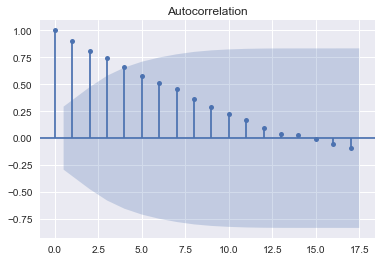

In [24]:
from statsmodels.graphics.tsaplots import plot_acf

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

#test1 = SP_500['Close']
#test2 = test1[::-1]
#print(test2)


#ax1.plot(test2)
#ax1.set_title("Original")
# add ; at the end of the plot function so that the plot is not duplicated
plot_acf(Reverse_SP_500_Close_Values)
plt.show()

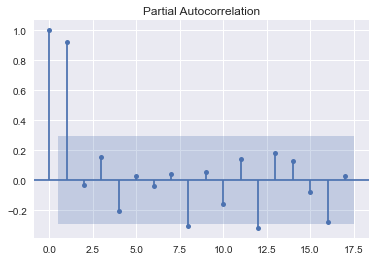

In [25]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(Reverse_SP_500_Close_Values)
plt.show()

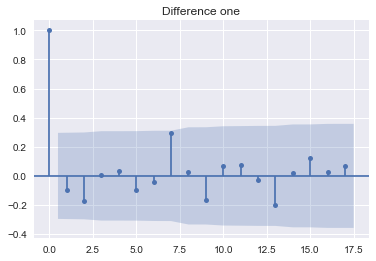

In [28]:
diff = Reverse_SP_500_Close_Values.diff().dropna()

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))


plot_acf(diff)
plt.title('Difference one')
plt.show()

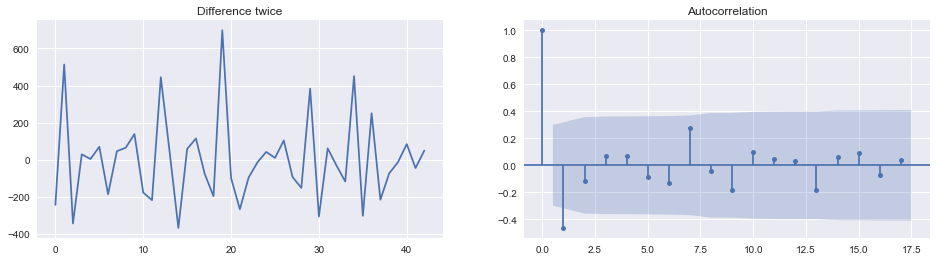

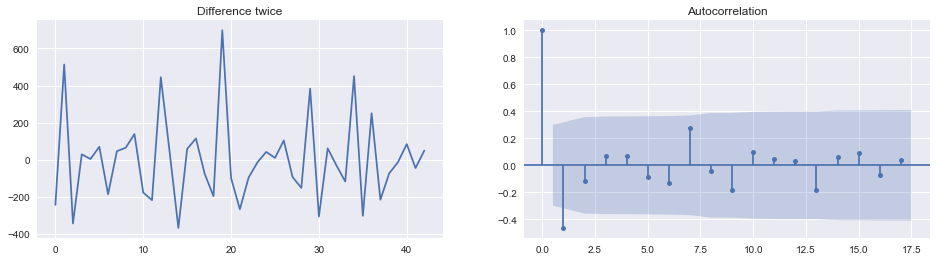

In [29]:
diff = test2.diff().diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff)
ax1.set_title("Difference twice")
plot_acf(diff, ax=ax2)

In [30]:
from pmdarima.arima.utils import ndiffs

ndiffs(SP_500['Close'], test="adf")

1

<b>p</b>

p is the order of the Auto Regressive (AR) term. It refers to the number of lags to be used as predictors. 

We can find out the required number of AR terms by inspecting the Partial Autocorrelation (PACF) plot.

The partial autocorrelation represents the correlation between the series and its lags. 

In [31]:
from statsmodels.graphics.tsaplots import plot_pacf

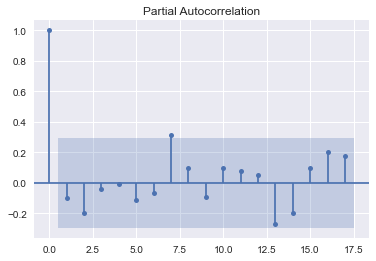

In [31]:
diff = Reverse_SP_500_Close_Values.diff().dropna()

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

#ax1.plot(diff)
#ax1.set_title("Difference once")
#ax2.set_ylim(0, 1)
plot_pacf(diff)
plt.show()

We can observe that the PACF lag 6 is significant as it's above the significance line.

#### q

q is the order of the Moving Average (MA) term. It refers to the number of lagged forecast errors that should go into the ARIMA Model.

We can look at the ACF plot for the number of MA terms.

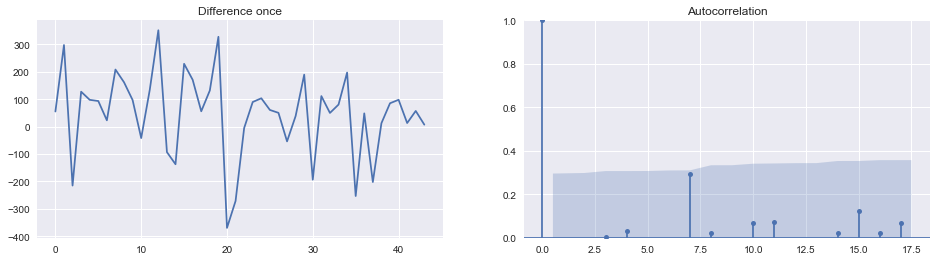

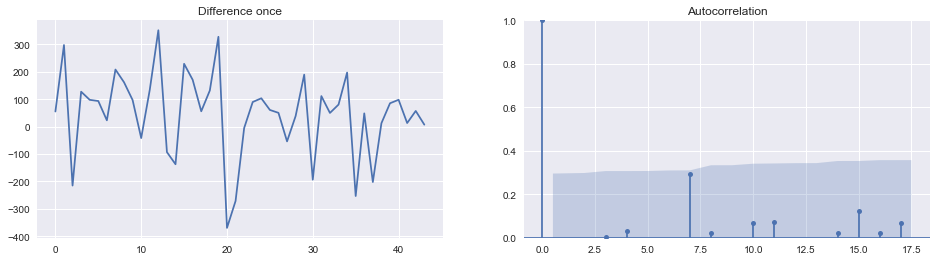

In [33]:
## Done above

#diff = test2.diff().dropna()#

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

#ax1.plot(diff)
#ax1.set_title("Difference once")
#ax2.set_ylim(0, 1)
#plot_acf(diff, ax=ax2)

### Fitting the ARIMA model

In [32]:
from statsmodels.tsa.arima_model import ARIMA

# ARIMA Model
model = ARIMA(Reverse_SP_500_Close_Values, order=(1, 1, 1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                   44
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -283.326
Method:                       css-mle   S.D. of innovations            151.371
Date:                Mon, 08 Nov 2021   AIC                            574.652
Time:                        21:43:28   BIC                            581.789
Sample:                             1   HQIC                           577.299
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            45.5185     16.511      2.757      0.006      13.157      77.880
ar.L1.D.Close     0.4516      0.400      1.130      0.258      -0.332       1.235
ma.L1.D.Close    -0.6101      0.344     -1.774      0.076      -1.284       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.2146           +0.0000j            2.2146            0.0000
MA.1            1.6392           +0.0000j            1.6392            0.0000
-----------------------------------------------------------------------------
"""

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-465.96, -391.11, -316.27, -241.42, -166.58,  -91.73,  -16.88,
          57.96,  132.81,  207.66,  282.5 ]),
 <BarContainer object of 10 artists>)

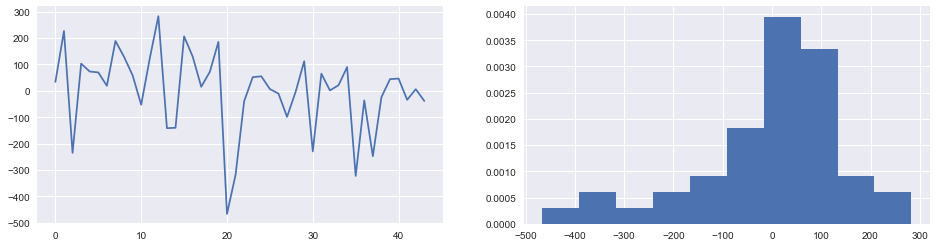

In [33]:
# Plot residual errors
residuals = pd.DataFrame(result.resid)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(residuals)
ax2.hist(residuals, density=True)

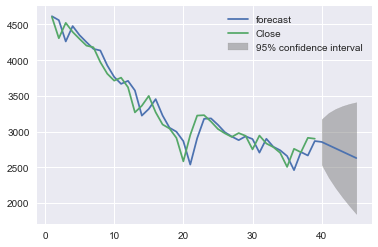

In [53]:
# Actual vs Fitted
result.plot_predict(
    start=1, end=45, dynamic=False,
)
plt.show()

### Train test split 

In [54]:
n = int(len(df) * 0.8)
train = SP_500['Close'][:n]
test = SP_500['Close'][n:]

In [55]:
print(len(train))
print(len(test))

40
5


In [56]:
step = 5

model = ARIMA(train, order=(0, 1, 0))
result = model.fit(disp=0)

# Forecast
fc, se, conf = result.forecast(step)

print('fc')
print(fc)
print(len(fc))

fc
[2856.42 2811.31 2766.21 2721.1  2676.  ]
5


In [57]:
fc = pd.Series(fc, index=test[:step].index)

lower = pd.Series(conf[:, 0], index=test[:step].index)
upper = pd.Series(conf[:, 1], index=test[:step].index)


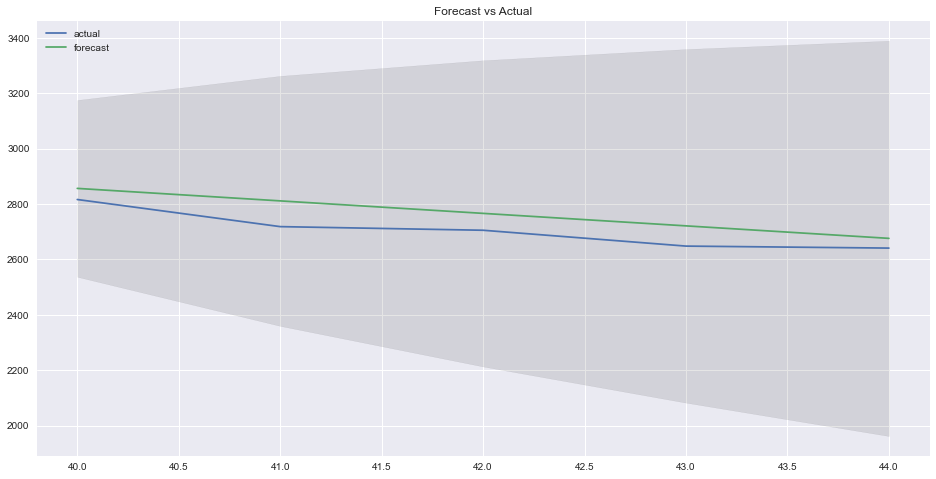

In [58]:
plt.figure(figsize=(16, 8))
plt.plot(test[:step], label="actual")
plt.plot(fc, label="forecast")
plt.fill_between(lower.index, lower, upper, color="k", alpha=0.1)
plt.title("Forecast vs Actual")
plt.legend(loc="upper left")

### Auto ARIMA

The pmdarima package provides an auto_arima method that uses a stepwise approach to search multiple combinations of p,d,q parameters and chooses the best model that has the least AIC.

In [59]:
from pmdarima.arima import auto_arima

In [60]:
model = auto_arima(
    SP_500['Close'],
    start_p=1,
    start_q=1,
    test="adf",
    max_p=6,
    max_q=6,
    m=1,  # frequency of series
    d=None,  # determine 'd'
    seasonal=False,  # no seasonality
    trace=True,
    stepwise=True,
)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=574.511, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=572.030, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=573.643, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=573.387, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=573.782, Time=0.01 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0] intercept
Total fit time: 0.212 seconds


------------------------------------------------------------------

#### SARIMA

THe problem with plain ARIMA model is it doesn't support seasonality.

If your time series has defined seasonality, then, go for SARIMA which uses seasonal differencing.
Seasonal differencing is similar to regular differencing, but, instead of subtracting consecutive terms, you subtract the value from previous season.

So, the model will be represented as SARIMA(p,d,q)x(P,D,Q), where, P, D and Q are SAR, order of seasonal differencing and SMA terms respectively and 'x' is the frequency of the time series.

If your model has well defined seasonal patterns, then enforce D=1 for a given frequency ‘x’.

Here’s some practical advice on building SARIMA model:

As a general rule, set the model parameters such that D never exceeds one. And the total differencing ‘d + D’ never exceeds 2. Try to keep only either SAR or SMA terms if your model has seasonal components.

The <b>SARIMA model</b> buildsupon the ARIMA model. It also imcludes the p, q and d parameters, but also an extra set of parameters to account for time series seasonality.

- <b>P:</b> The Order of the seasonal autoregressive model.
- <b>Q:</b> The order of the seasonal moving average model.
- <b>D:</b> THe number of seasonal differences applied to the time series.

Therefore we can denote the notation of the SARIMA model as SARIMA(p,d,q)(P,D,Q,s)

In [61]:
data = pd.read_csv("SaP_500_3yrs_Monthly.csv", parse_dates=['Date'], index_col='Date')

print(data)

               Open     High      Low    Close
Date                                          
2021-11-01  4610.62  4663.46  4595.06  4660.57
2021-10-01  4317.16  4608.08  4278.94  4605.38
2021-09-01  4528.80  4545.85  4305.91  4307.54
2021-08-01  4406.86  4537.36  4367.73  4522.68
2021-07-01  4300.73  4429.97  4233.13  4395.26
2021-06-01  4216.52  4302.43  4164.40  4297.50
2021-05-01  4191.98  4238.04  4056.88  4204.11
2021-04-01  3992.78  4218.78  3992.78  4181.17
2021-03-01  3842.51  3994.41  3723.34  3972.89
2021-02-01  3731.17  3950.43  3725.62  3811.15
2021-01-01  3764.61  3870.90  3662.71  3714.24
2020-12-01  3645.87  3760.20  3633.40  3756.07
2020-11-01  3336.25  3645.99  3336.25  3621.63
2020-10-01  3385.87  3549.85  3233.94  3269.96
2020-09-01  3507.44  3588.11  3209.45  3363.00
2020-08-01  3288.26  3514.77  3284.53  3500.31
2020-07-01  3105.92  3279.99  3101.17  3271.12
2020-06-01  3038.78  3233.13  2965.66  3100.29
2020-05-01  2869.09  3068.67  2766.64  3044.31
2020-04-01  2

In [69]:
## Plot

#Fix
#fig, ax = plt.subplots(figsize=(10,5), dpi=100, sharex=True)


# Usual Differencing
#axes[0].plot(data, label='Original Series')
#axes[0].plot(data.diff(1), label='Usual Differencing')
#axes[0].set_title('Usual Differencing')
#axes[0].legend(loc='upper left', fontsize=10)#


# Seasinal Dei
#axes[1].plot(data, label='Original Series')
#axes[1].plot(data.diff(12), label='Seasonal Differencing', color='green')
#axes[1].set_title('Seasonal Differencing')
#plt.legend(loc='upper left', fontsize=10)
#plt.suptitle('a10 - Drug Sales', fontsize=16)
#plt.show()

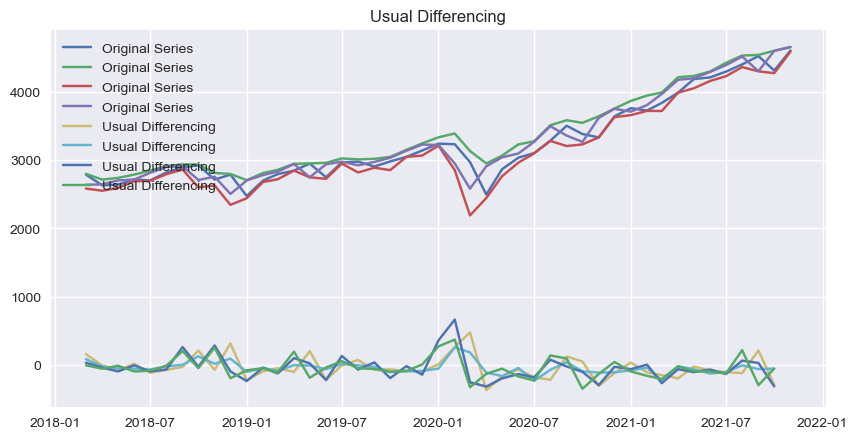

In [70]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100, sharex=True)

plt.plot(data, label='Original Series')
plt.plot(data.diff(1), label='Usual Differencing')
plt.title('Usual Differencing')
plt.legend(loc='upper left', fontsize=10)

plt.show()

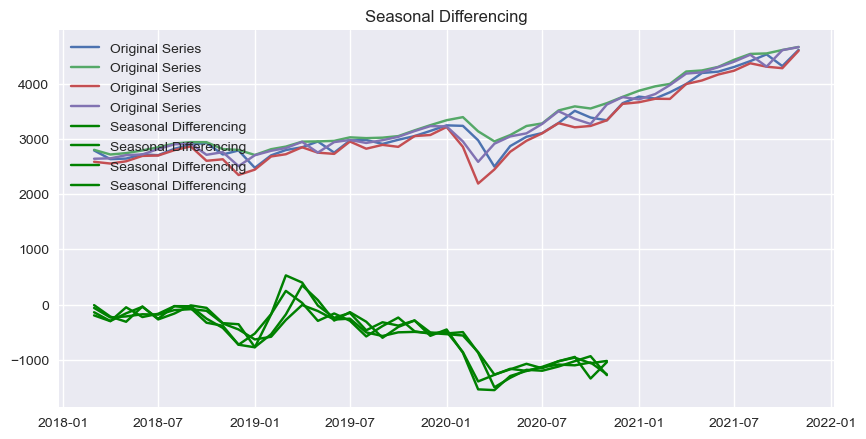

In [71]:
fig, ax = plt.subplots(figsize=(10,5), dpi=100, sharex=True)

plt.plot(data, label='Original Series')
plt.plot(data.diff(12), label='Seasonal Differencing', color = 'green')
plt.title('Seasonal Differencing')
plt.legend(loc='upper left', fontsize=10)

plt.show()

As you can clearly see, the seasonal spikes is intact after applying usual differencing (lag 1). Whereas, it is rectified after seasonal differencing.

Let’s build the SARIMA model using pmdarima‘s auto_arima(). To do that, you need to set seasonal=True, set the frequency m=12 for month wise series and enforce D=1

In [72]:
# !pip3 install pyramid-arima
import pmdarima as pm

# Seasonal - fit stepwise auto-ARIMA
smodel = pm.auto_arima(data['Close'], start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,2,1)(0,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=449.728, Time=0.01 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=439.806, Time=0.08 sec
 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=449.781, Time=0.04 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=441.800, Time=0.21 sec
 ARIMA(1,2,0)(1,1,1)[12]             : AIC=441.798, Time=0.20 sec
 ARIMA(1,2,0)(0,1,1)[12]             : AIC=inf, Time=0.16 sec
 ARIMA(1,2,0)(2,1,1)[12]             : AIC=inf, Time=0.50 sec
 ARIMA(0,2,0)(1,1,0)[12]             : AIC=442.103, Time=0.05 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=434.900, Time=0.10 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=441.838, Time=0.05 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=436.811, Time=0.28 sec
 ARIMA(2,2,0)(1,1,1)[12]             : AIC=436.798, Time=0.23 sec
 ARIMA(2,2,0)(0,1,1)[12]             : AIC=inf, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   45
Model:             SARIMAX(3, 2, 0)x(1, 1, 0, 12)   Log Likelihood                -212.361
Date:                            Tue, 09 Nov 2021   AIC                            434.722
Time:                                    01:48:01   BIC                            441.892
Sample:                                         0   HQIC                           437.059
                                             - 45                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6864      0.192     -3.567      0.000      -1.064      -0.309
ar.L2         -0.6055      0.222     -2.732      0.006      -1.040      -0.171
ar.L3         -0.2884      0.168     -1.721      0.085      -0.617       0.040
ar.S.L12      -0.6954      0.177     -3.919      0.000      -1.043      -0.348
sigma2      3.638e+04   1.31e+04      2.774      0.006    1.07e+04    6.21e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 2.29
Prob(Q):                              0.80   Prob(JB):                         0.32
Heteroskedasticity (H):               0.99   Skew:                             0.65
Prob(H) (two-sided):                  0.98   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model has estimated the AIC and the P values of the coefficients look significant. Let’s look at the residual diagnostics plot.

The best model SARIMAX(3, 0, 0)x(0, 1, 1, 12) has an AIC of 528.6 and the P Values are significant.

Let’s forecast for the next 24 months.

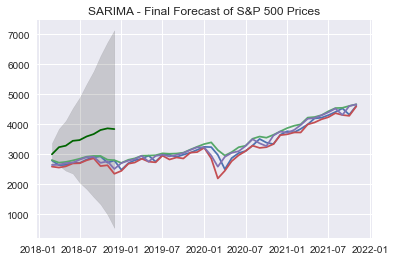

In [80]:
# Forecast
n_periods = 10
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(data.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast of S&P 500 Prices")
plt.show()

### Things for the report

- A description of the sources and contents of the datasets;
- Descriptive statistics for the variables of interest;
- A clear statement of the objectives of the analysis, i.e which variable are you trying to predict;
- An appropriate analysis performed using R, Python or any other software tool of your choice;
- A report on the results showing comparison between at least two different models or differentparameterisations of the same model;